In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\lroes\Documents\DCU\Data\Portfolio\Projects\Python\Supervised Learning\Dataset_Fuel types.csv"
fuel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
fuel_data.head(), fuel_data.info(), fuel_data.describe()

C:\Users\lroes\AppData\Local\Temp\ipykernel_35540\2114575855.py:5: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   drive                              36924 non-null  object 
 6   transmission                       38102 non-null  object 
 7   transmission_type                  15045 non-null  object 
 8   engine_index                       38113 non-null  int64  
 9   engine_descriptor                  22693 non-null  object 
 10  engine_cylinders                   37977 non-null  float64
 11  engine_displacement                37979 non-null  flo

(   vehicle_id  year        make               model  \
 0       26587  1984  Alfa Romeo           GT V6 2.5   
 1       27705  1984  Alfa Romeo           GT V6 2.5   
 2       26561  1984  Alfa Romeo  Spider Veloce 2000   
 3       27681  1984  Alfa Romeo  Spider Veloce 2000   
 4       27550  1984  AM General   DJ Po Vehicle 2WD   
 
                          class          drive       transmission  \
 0             Minicompact Cars            NaN     Manual 5-Speed   
 1             Minicompact Cars            NaN     Manual 5-Speed   
 2                  Two Seaters            NaN     Manual 5-Speed   
 3                  Two Seaters            NaN     Manual 5-Speed   
 4  Special Purpose Vehicle 2WD  2-Wheel Drive  Automatic 3-Speed   
 
   transmission_type  engine_index engine_descriptor  ...  \
 0               NaN          9001             (FFS)  ...   
 1               NaN          9005    (FFS) CA model  ...   
 2               NaN          9002             (FFS)  ...   
 3

In [2]:
# Data cleaning steps
# 1. Removing columns with a high percentage of missing values
threshold = 0.5  # Columns with more than 50% missing values will be dropped
columns_to_drop = fuel_data.columns[fuel_data.isnull().mean() > threshold]
cleaned_data = fuel_data.drop(columns=columns_to_drop)

# 2. Dropping any duplicate rows, if they exist
cleaned_data = cleaned_data.drop_duplicates()

# 3. Filling missing values where appropriate
# For categorical data, we'll use the mode (most common value)
# For numerical data, we'll use the median
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == 'object':
        cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mode()[0])
    else:
        cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].median())

# Check the cleaned data
cleaned_data.info(), cleaned_data.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38113 entries, 0 to 38112
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   drive                              38113 non-null  object 
 6   transmission                       38113 non-null  object 
 7   engine_index                       38113 non-null  int64  
 8   engine_descriptor                  38113 non-null  object 
 9   engine_cylinders                   38113 non-null  float64
 10  engine_displacement                38113 non-null  float64
 11  fuel_type                          38113 non-null  obj

(None, 0)

C:\Users\lroes\AppData\Local\Temp\ipykernel_35540\1757243587.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_data.corr()


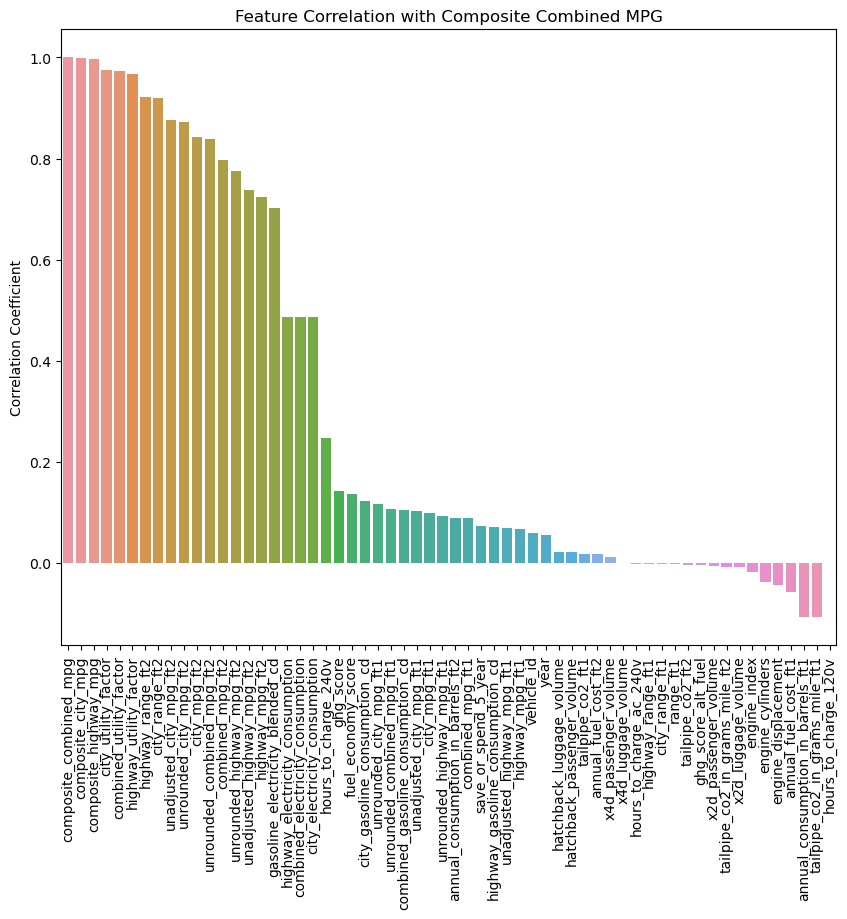

composite_combined_mpg     1.000000
composite_city_mpg         0.998412
composite_highway_mpg      0.997304
city_utility_factor        0.975694
combined_utility_factor    0.973004
highway_utility_factor     0.967852
highway_range_ft2          0.922445
city_range_ft2             0.919812
unadjusted_city_mpg_ft2    0.876343
unrounded_city_mpg_ft2     0.873111
Name: composite_combined_mpg, dtype: float64

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify features strongly correlated with combined MPG (composite_combined_mpg)
correlation_matrix = cleaned_data.corr()
correlation_target = correlation_matrix["composite_combined_mpg"].sort_values(ascending=False)

# Plotting the correlation with the target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_target.index, y=correlation_target.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Composite Combined MPG')
plt.ylabel('Correlation Coefficient')
plt.show()

# Output the strongest correlations
correlation_target.head(10)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting relevant features and the target variable
features = ['composite_city_mpg', 'composite_highway_mpg', 'city_utility_factor', 
            'highway_utility_factor', 'unadjusted_city_mpg_ft2']
target = 'composite_combined_mpg'

# Prepare feature data and target
X = cleaned_data[features]
y = cleaned_data[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((30490, 5), (7623, 5), (30490,), (7623,))

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output the evaluation metrics
r2, rmse


(0.9998693224478774, 0.029231471191125413)

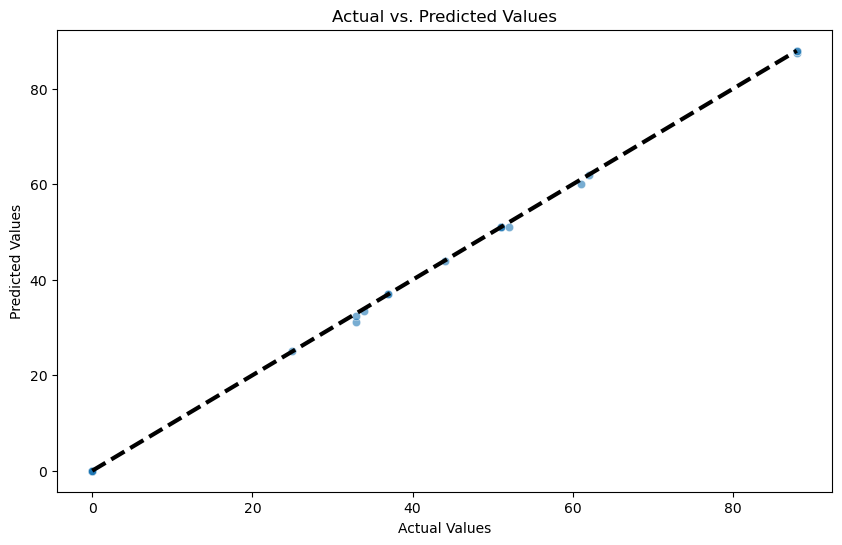

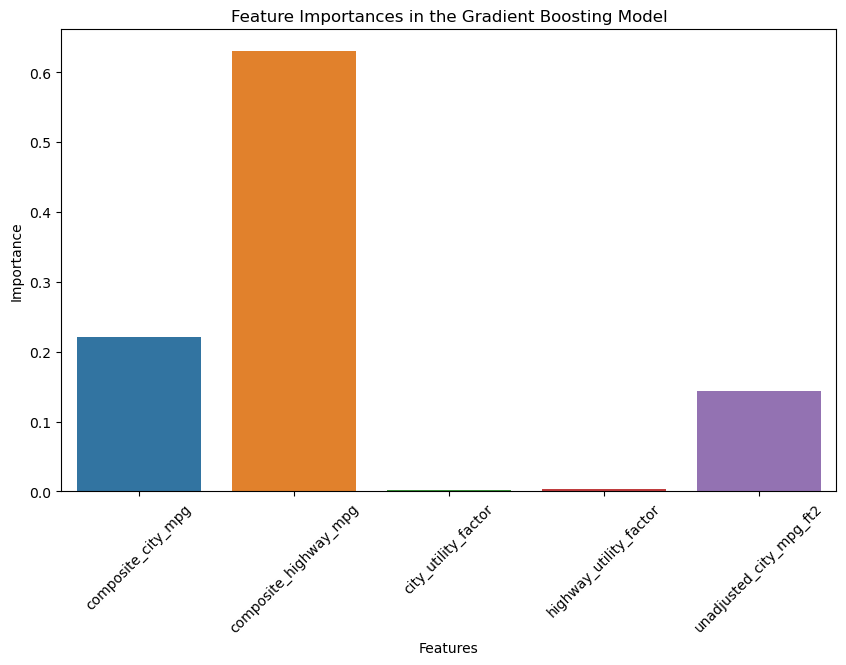

In [6]:
# Visualizing Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Visualizing Feature Importances
feature_importances = gbm.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in the Gradient Boosting Model')
plt.xticks(rotation=45)

plt.show()
